In [2]:
!pip install pydicom

     |████████████████████████████████| 1.9MB 5.6MB/s 


In [17]:
import pydicom
import numpy as np
from PIL import Image

In [21]:
#Ler dcm file
filename = 'Image-3.dcm'
ds = pydicom.dcmread(filename)

# Pegue o array do dicom
data = ds.pixel_array
print(data)
print('A imagem possui a seguinte dimensão {} x {}'.format(data.shape[0],
                                        data.shape[1]))
l1 = int(np.round(data.shape[0] *0.1))
l2 = int(np.round(data.shape[0] *0.9))
h1 = int(np.round(data.shape[1] *0.1))
h2 = int(np.round(data.shape[1] *0.9))
#cortar o dicom em 20% em cada dimensão
_cropdcm = data[l1:l2,h1:h2]

print('A imagem possui a seguinte dimensão {} x {} '.format(
    _cropdcm.shape[0], _cropdcm.shape[1]))

# colocando o novo pixel no dcm
ds.PixelData = _cropdcm.tostring()

# atualizando o dcm file quanto ao shape
ds.Rows = _cropdcm.shape[0]
ds.Columns = _cropdcm.shape[1]

# print the image information given in the dataset
print('As informaçoes do novo arquivo dcm após crop: \n')
print(ds)
print(ds.pixel_array)
print(len(ds.PixelData))
ds.save_as("after.dcm")

[[[19 33 50]
  [19 33 50]
  [19 34 50]
  ...
  [19 33 50]
  [19 34 50]
  [19 33 50]]

 [[19 34 50]
  [20 33 50]
  [19 34 50]
  ...
  [19 34 50]
  [19 34 50]
  [19 34 50]]

 [[19 33 50]
  [19 33 50]
  [19 34 50]
  ...
  [19 33 50]
  [19 34 50]
  [19 34 50]]

 ...

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]]
A imagem possui a seguinte dimensão 768 x 1024
A imagem possui a seguinte dimensão 614 x 820 
As informaçoes do novo arquivo dcm após crop: 

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 198
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Ultrasound Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.826.0.1.3680043.10.474.271280

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.


In [25]:
import matplotlib.pyplot as plt

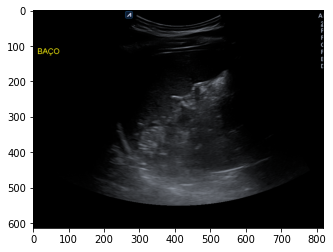

In [26]:
plt.imshow(_cropdcm)